<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вопрос" data-toc-modified-id="Вопрос-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вопрос</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn. preprocessing import OneHotEncoder

In [1]:
data = pd.read_csv('/datasets/insurance.csv')

NameError: name 'pd' is not defined

In [4]:
#Посмотрим на данные 

def data_overview(data):
    display(data.head())
    display(data.info())
    print("Пропуски:", data.isna().sum())
    print("Явные дубликаты:", data.duplicated().sum())
    print('')
    colnames = data.select_dtypes('number').columns
    for name in colnames:
            data[name].plot.hist()
            plt.title(name)
            plt.show()
            
    print("Таблица корреляций Пирсона для всех численных переменных")
    print(data.corr(numeric_only = True))
    print('')
    print("Диаграммы рассеяния для всех численных переменных")
    
    for i in range(0,4,1):
        for j in reversed(range(0,4,1)):
            if i != j:
                data.plot.scatter(x = colnames[i], y = colnames[j])
                plt.xlabel(colnames[i])
                plt.ylabel(colnames[j])
                plt.show()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Пропуски: Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
Явные дубликаты: 153



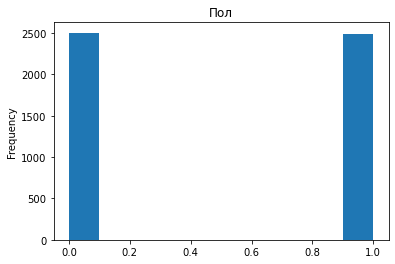

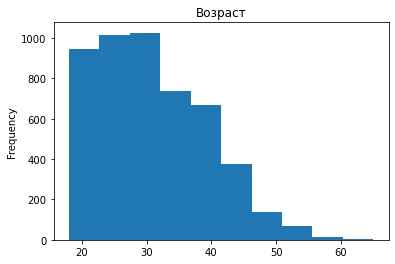

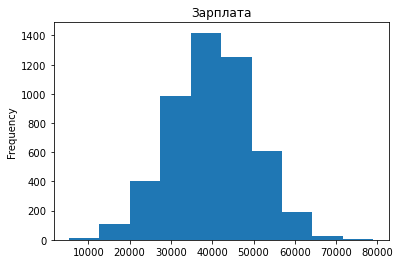

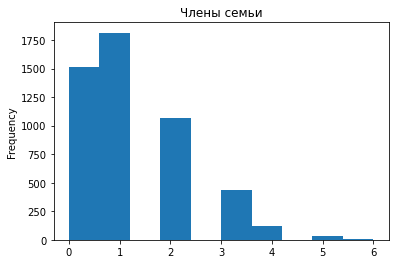

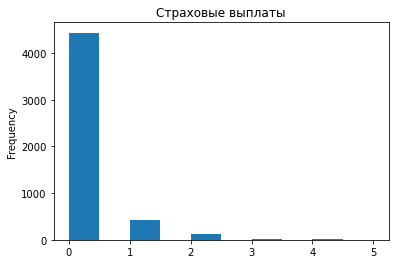

Таблица корреляций Пирсона для всех численных переменных
                        Пол   Возраст  Зарплата  Члены семьи   
Пол                1.000000  0.002074  0.014910    -0.008991  \
Возраст            0.002074  1.000000 -0.019093    -0.006692   
Зарплата           0.014910 -0.019093  1.000000    -0.030296   
Члены семьи       -0.008991 -0.006692 -0.030296     1.000000   
Страховые выплаты  0.010140  0.651030 -0.014963    -0.036290   

                   Страховые выплаты  
Пол                         0.010140  
Возраст                     0.651030  
Зарплата                   -0.014963  
Члены семьи                -0.036290  
Страховые выплаты           1.000000  

Диаграммы рассеяния для всех численных переменных


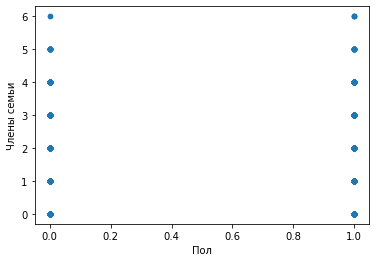

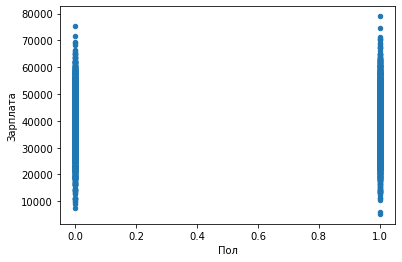

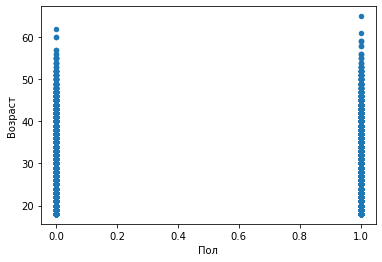

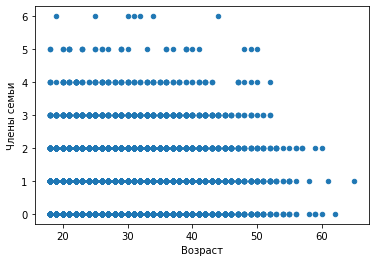

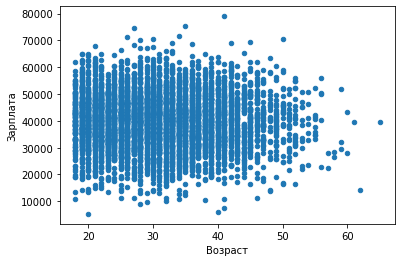

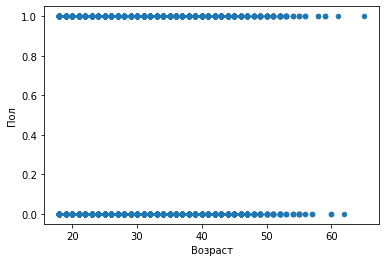

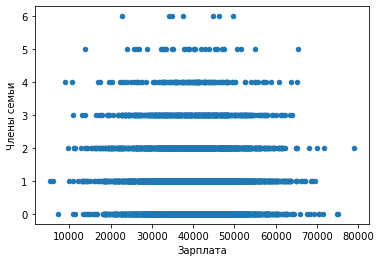

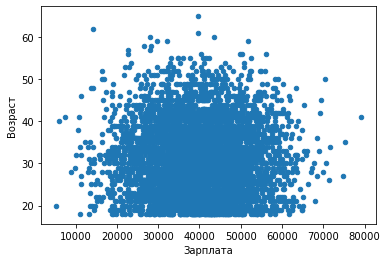

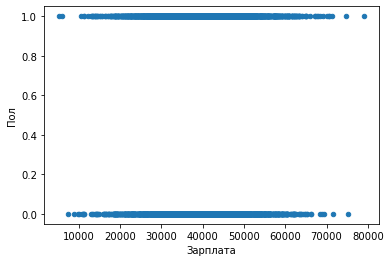

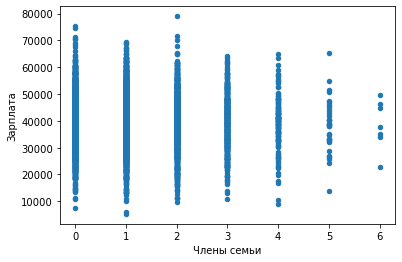

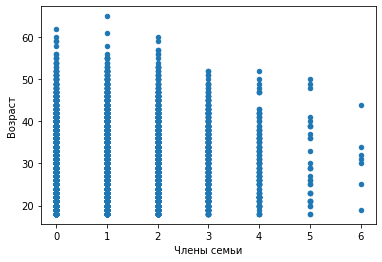

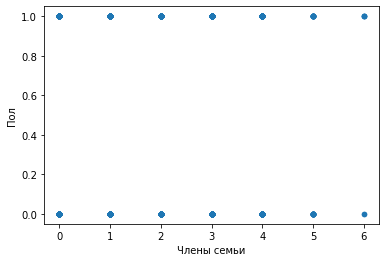

In [5]:
data_overview(data)

Сильных корреляций между признаками нет, пропусков нет (хотя уже видна корреляция между целевым признаком (числом выплат) и возрастом)

Есть гостка полные дубликаты, но, теоретически, это могут быть люди с случайно полным совпадением параметров, в данном случае это вполне возможная ситуация, тем более, что ID у нас здесь нет


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Вопрос

Признаки умножают на обратимую матрицу. 
Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Ответ b, не изменится

**Обоснование:** 


Нам известно, что: 
-  $ a = Xw $    
(где а - вектор предсказания, Х - матрица признаков и w - вектор весов, которые и являются параметрами линейной регрессии)
-  $ w = (X^T X)^{-1} X^T y $
(где 𝑦 — вектор целевого признака)

Умножая исходную матрицу признаков на случайно сгенерированную матрицу-ключ, мы получаем:
-  $ XP $ 
где P - матрица преобразования
- и $ w' $ - новый вектор весов, который соотвественно равен $ w' = (XP^T XP)^{-1} XP^T y $

Нам также известны следующие свойства матриц:
- Ассоциативность: $ (ABC) = (AB)C $ и НЕКОММУТАТИВНОСТЬ (AB != BA)
- Умножение матрицы единичную матрицу дает ту же матрицу, при этом умножение матрицы на обратную дает единичную: $ AE = A $ , $ AA{-1} = E $
- Транспонированная обратная матрица равна обратной транспонированной (уф): $ (A^T)^{-1}= (A^{-1})^T $
- Проиведение транспонированных матриц равно транспонированной матрице произведения:
$ (AB)^T= B^TA^T $
- И произведение обратных матриц равно обратной матрице произвдения: $ (AB)^{-1}=B^{-1}A^{-1} $

Вооруженные всеми этими знаниями, раскроем скобки в формуле $ w' $ - вектора весов для зашифрованных признаков:

$ w' = (XP^T XP)^{-1} XP^T y $

$ w' = (P^T (X^TX) P)^{-1} P^TX^T y  = P^{-1} (X^TX)^{-1} ((P^T)^{-1}P^T) X^T = P^{-1} (X^TX)^{-1} E X^T = P^{-1} (X^TX)^{-1}X^T = P^{-1}w $   

При этом:

$ a = Xw = XEw = X (PP^{-1}) w = (XP)P^{-1}) w = (XP)w' = a'$ 

То есть предсказания модели на изначальных данных будут равны предсказаниям модели на преобразованных данных.

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. 
Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм**
- Делим данные на таблицу признаков и целевой признак
- Делим данные на обучающую и тестовую выборку
- Создаем матрицу-ключ методом np.random.randn()
- Проверяем, обратимая ли у нас получилась матрица
- Умножаем обучающие признаки на матрицу-ключ, создаем таким образом зашифрованный датасет признаков
- Умножаем тестовые признаки на матрицу-ключ (предположительно, в реальном сценарии мы тоже будем так делать для анонимизации новых данных)
- Обучаем модель на обучающей выборке (чтобы проверить, не изменится ли качество модели, обучим две модели - на зашифрованных и на не зашифрованных признаках)
- Получаем предсказания моделей на тестовых данных
- Подсчитываем $ r^2 $ моделей и сравниваем их
...

## Проверка алгоритма

In [6]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.25, random_state=12345)

model = linear_model.LinearRegression()
model_p = linear_model.LinearRegression()

In [8]:
p_matrix = np.random.randn(4, 4)
inverse_p = np.linalg.inv(p_matrix)

features_train_p = features_train @ p_matrix
features_test_p = features_test @ p_matrix

In [12]:
print(p_matrix @ inverse_p)

#вроде бы все эти числа (кроме законных 1 по диагонале) - очень близки к нулю, но не нули
# Почему так получается?

[[ 1.00000000e+00  1.94289029e-16  4.44089210e-16 -2.77555756e-16]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16 -2.22044605e-16]
 [-2.22044605e-16  4.44089210e-16  1.00000000e+00  2.22044605e-16]
 [ 2.77555756e-16  1.11022302e-16  0.00000000e+00  1.00000000e+00]]


In [13]:
model.fit(features_train, target_train)
r2 = model.score(features_test, target_test)
print('R2 для модели, обученной на изначальных признаках =', r2)

R2 для модели, обученной на изначальных признаках = 0.4352275712702701


In [14]:
model_p.fit(features_train_p, target_train)
r2_p = model_p.score(features_test_p, target_test)
print('R2 для модели, обученной на преобразованных признаках =', r2_p)

R2 для модели, обученной на преобразованных признаках = 0.43522757127225686


In [15]:
features_train_restored = features_train_p @ inverse_p
features_test_restored = features_test_p @ inverse_p

In [19]:
display(features_train_restored.head())
display(features_train.head())

,0,1,2,3
3369,1.000000e+00,43.0,36200.0,1.000000e+00
1441,1.000000e+00,34.0,57600.0,1.455192e-11
571,2.182787e-11,32.0,41100.0,1.000000e+00
225,-1.455192e-11,36.0,45100.0,1.000000e+00
2558,-4.365575e-11,33.0,50600.0,2.000000e+00


,Пол,Возраст,Зарплата,Члены семьи
3369,1,43.0,36200.0,1
1441,1,34.0,57600.0,0
571,0,32.0,41100.0,1
225,0,36.0,45100.0,1
2558,0,33.0,50600.0,2


**Вывод по проекту**

Перед нам стояла задача защитить персональнальные данные пользователей для дальнейшего анализа. 
Мы предложили алгоритм зашифровки данных посредсвом умножения матрицы признаков на случайным образом сгенерированную обратимую матрицу-ключ. 

Мы также прописали математическое обоснование того, что качество модели не ухудшиться после такого преобразования признаков и проверили это на практике, обучив две модели - на преобразованных и на изначальных признаках. 

Мы также проверили, что данные можно восстановить, умножим преобразованные признаки на обратную матрицу-ключ.